<a href="https://colab.research.google.com/github/Muhammad-Musharraf/Data-Analysis-Project-Using-Python/blob/main/Project_of_Sleep_health_and_lifestyle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import All Libraray**

In [1]:
#Import All Libraray
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Load Dataset**

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Sleep_health_and_lifestyle_dataset.csv')

In [4]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
df.sample(2)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
358,359,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN


#**Data Cleaning**

In [6]:
df.shape

(374, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [8]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [9]:
df.dtypes

,0
Person ID,int64
Gender,object
Age,int64
Occupation,object
Sleep Duration,float64
Quality of Sleep,int64
Physical Activity Level,int64
Stress Level,int64
BMI Category,object
Blood Pressure,object


In [10]:
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.nunique()

,0
Person ID,374
Gender,2
Age,31
Occupation,11
Sleep Duration,27
Quality of Sleep,6
Physical Activity Level,16
Stress Level,6
BMI Category,4
Blood Pressure,25


# Handling All Null Values

In [13]:
# Now i fill null Value
df['Sleep Disorder'].value_counts()

,count
Sleep Disorder,
Sleep Apnea,78
Insomnia,77


In [14]:
df['Sleep Disorder'].fillna(df['Sleep Disorder'].mode()[0],inplace=True)

/tmp/ipython-input-560005630.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sleep Disorder'].fillna(df['Sleep Disorder'].mode()[0],inplace=True)


In [15]:
df['Sleep Disorder'].isnull().sum()

np.int64(0)

In [16]:
df['Sleep Disorder'].unique()

array(['Sleep Apnea', 'Insomnia'], dtype=object)

In [17]:
df['Sleep Disorder'].value_counts()

,count
Sleep Disorder,
Sleep Apnea,297
Insomnia,77


In [18]:
# Again Check All Null value

df.isnull().sum()




,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


#**Data Filtering**

# **Data Visualization**

<Figure size 1000x500 with 0 Axes>

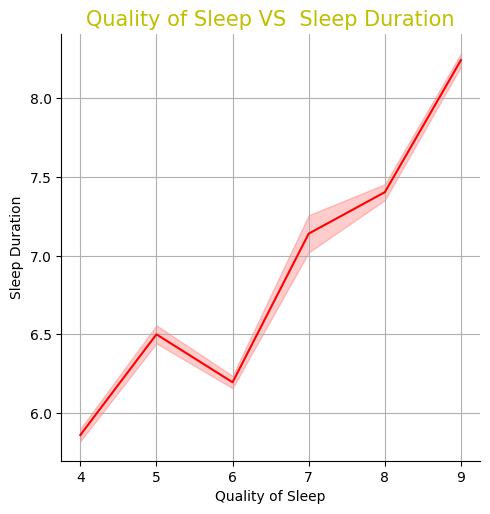

In [19]:
# First Analysze the  Sleep duration with Quality of Sleep With lineplot


plt.figure(figsize=(10,5))
sns.relplot(data=df,x='Quality of Sleep',y='Sleep Duration',kind='line',color='r')

plt.title('Quality of Sleep VS  Sleep Duration',fontsize=15,color='y')

plt.grid()
plt.show()

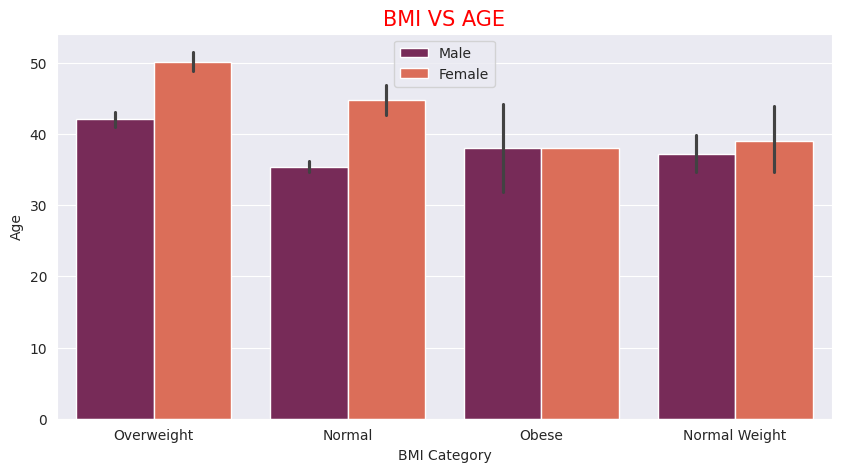

In [20]:


plt.figure(figsize=(10,5))
with sns.axes_style('darkgrid'):
  sns.barplot(data=df,x='BMI Category',y='Age',hue='Gender',palette='rocket')
  plt.title('BMI VS AGE',fontsize=15,color='r')
  plt.legend(loc=9)
  plt.show()

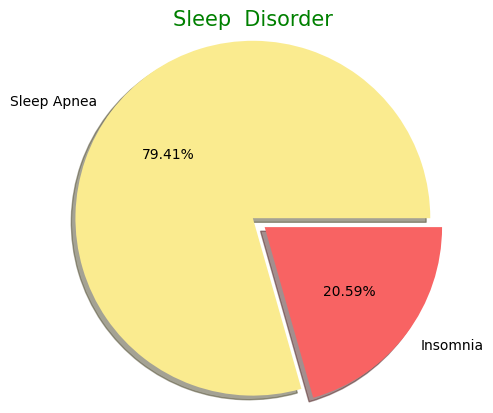

In [21]:
ex=[0,0.1]
plt.pie(df['Sleep Disorder'].value_counts(),labels=df['Sleep Disorder'].value_counts().index,radius=1.2,shadow=True,autopct='%0.2f%%',explode=ex,colors=['#FAEB8F','#F86363'])

plt.title('Sleep  Disorder',fontsize=15,color='g')
plt.show()


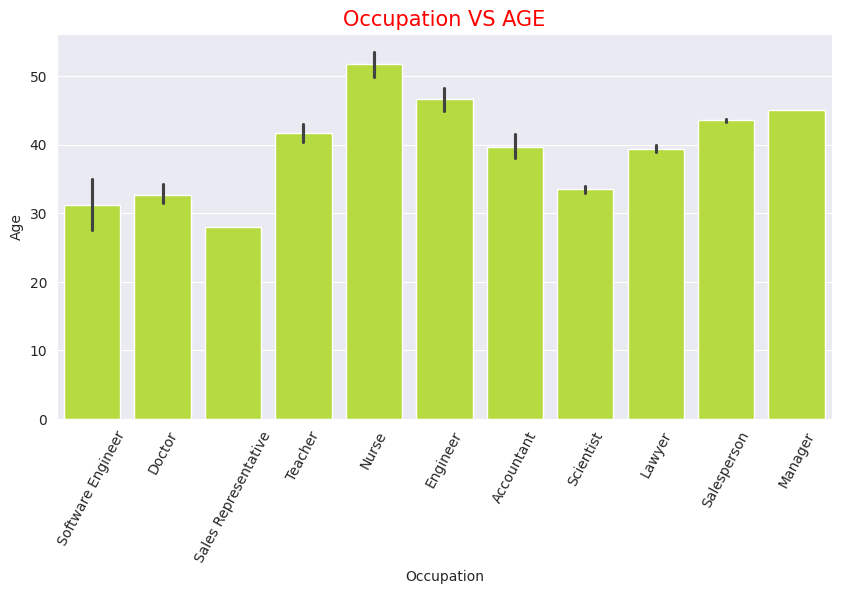

In [22]:

plt.figure(figsize=(10,5))
with sns.axes_style('darkgrid'):
  sns.barplot(data=df,x='Occupation',y='Age',color='#C2F527')
  plt.title('Occupation VS AGE',fontsize=15,color='r')
  plt.xticks(rotation=62)
  plt.show()

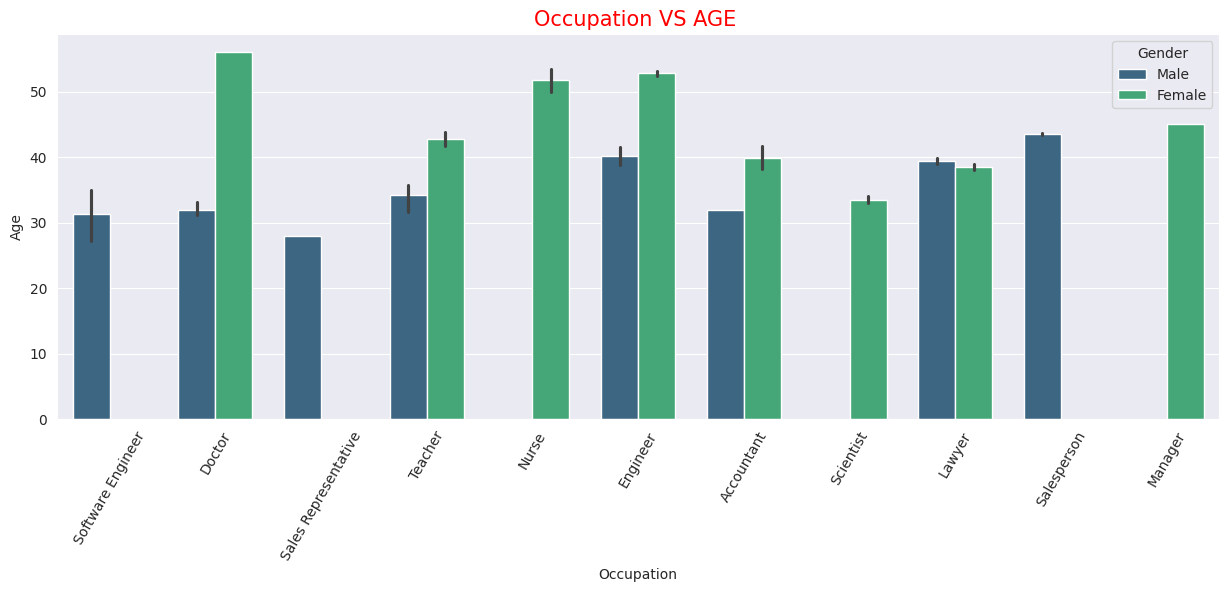

In [23]:

plt.figure(figsize=(15,5))
with sns.axes_style('darkgrid'):
  sns.barplot(data=df,x='Occupation',y='Age',palette='viridis',hue='Gender',width=0.7)
  plt.title('Occupation VS AGE ',fontsize=15,color='r')
  plt.xticks(rotation=60)
  plt.show()

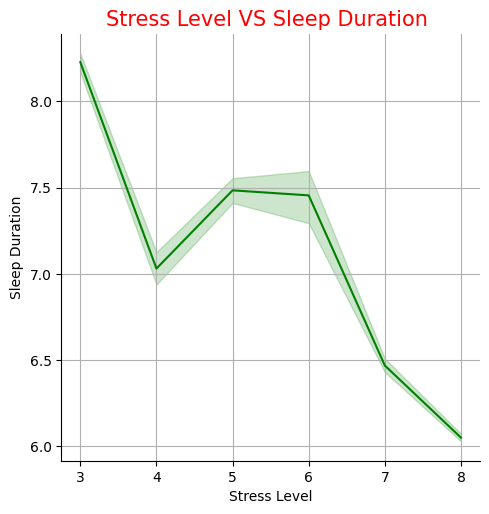

In [24]:


sns.relplot(data=df,x='Stress Level',y='Sleep Duration',color='g',kind='line')

plt.title('Stress Level VS Sleep Duration ',fontsize=15,color='r')

plt.grid()
plt.show()

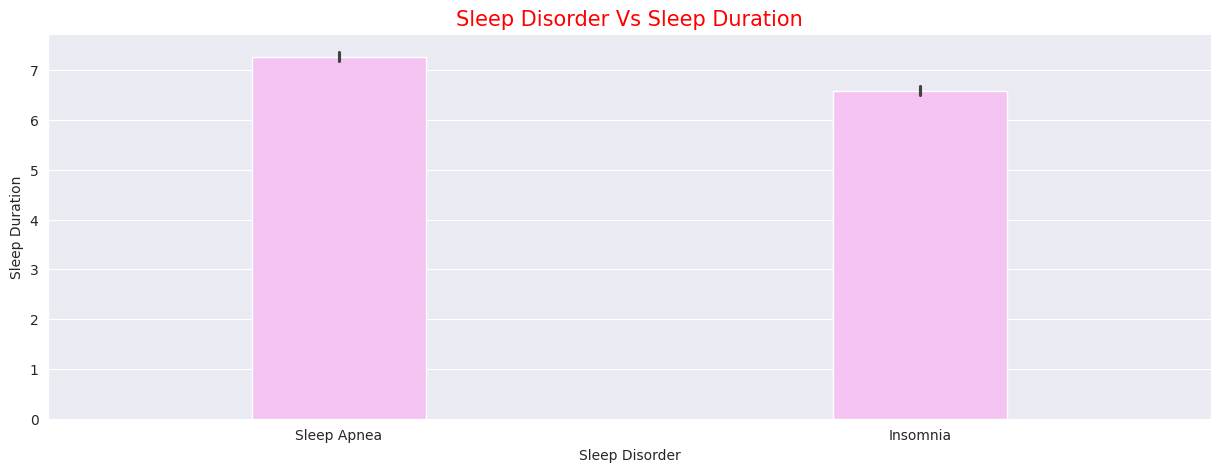

In [25]:


plt.figure(figsize=(15,5))
with sns.axes_style('darkgrid'):
  sns.barplot(data=df,x='Sleep Disorder',y='Sleep Duration',color='#FCBBFA',width=0.3)
  plt.title('Sleep Disorder Vs Sleep Duration',fontsize=15,color='r')
  plt.show()


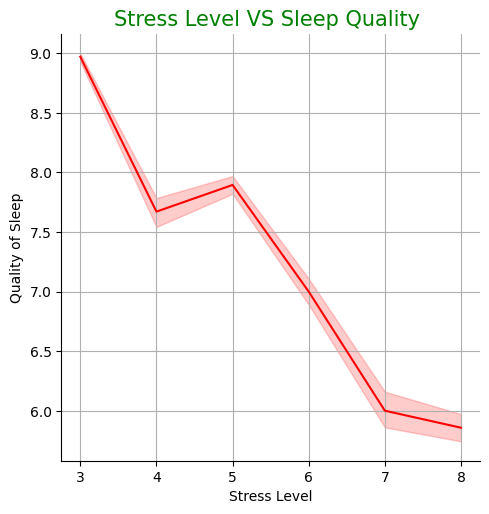

In [26]:



sns.relplot(data=df,x='Stress Level',y='Quality of Sleep',color='r',kind='line')

plt.title('Stress Level VS Sleep Quality ',fontsize=15,color='g')

plt.grid()
plt.show()

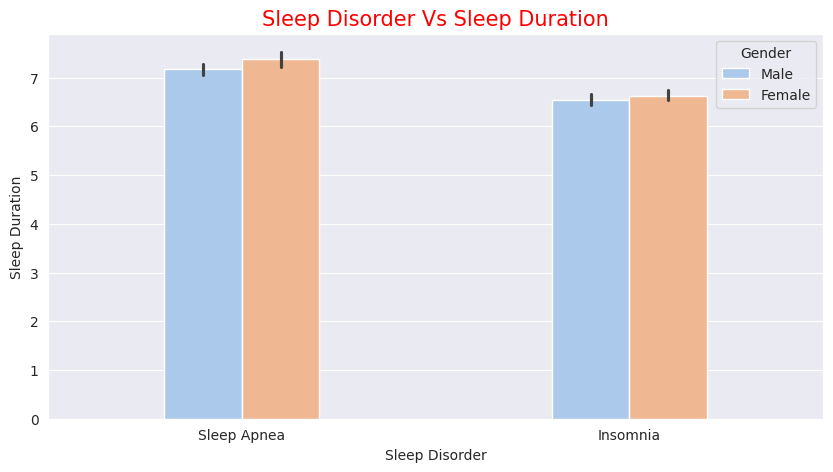

In [27]:
plt.figure(figsize=(10,5))
with sns.axes_style('darkgrid'):
  sns.barplot(data=df,x='Sleep Disorder',y='Sleep Duration',palette='pastel',width=0.4,hue='Gender')
  plt.title('Sleep Disorder Vs Sleep Duration',fontsize=15,color='r')
  plt.show()

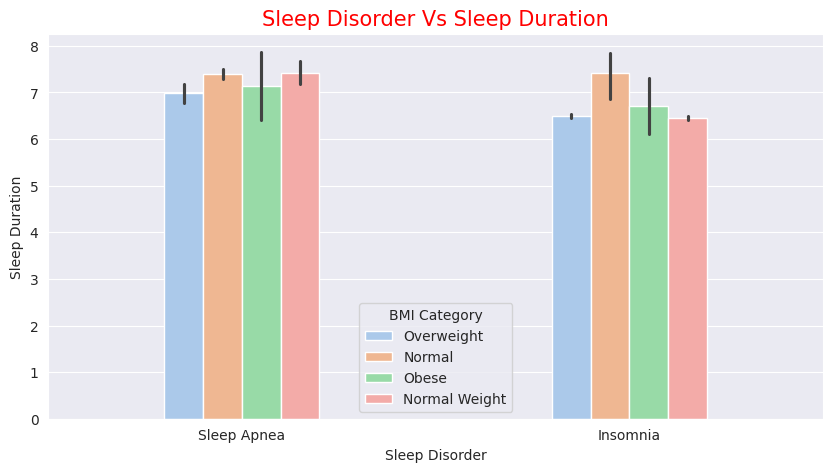

In [29]:
plt.figure(figsize=(10,5))
with sns.axes_style('darkgrid'):
  sns.barplot(data=df,x='Sleep Disorder',y='Sleep Duration',palette='pastel',width=0.4,hue='BMI Category')
  plt.title('Sleep Disorder Vs Sleep Duration',fontsize=15,color='r')
  plt.show()


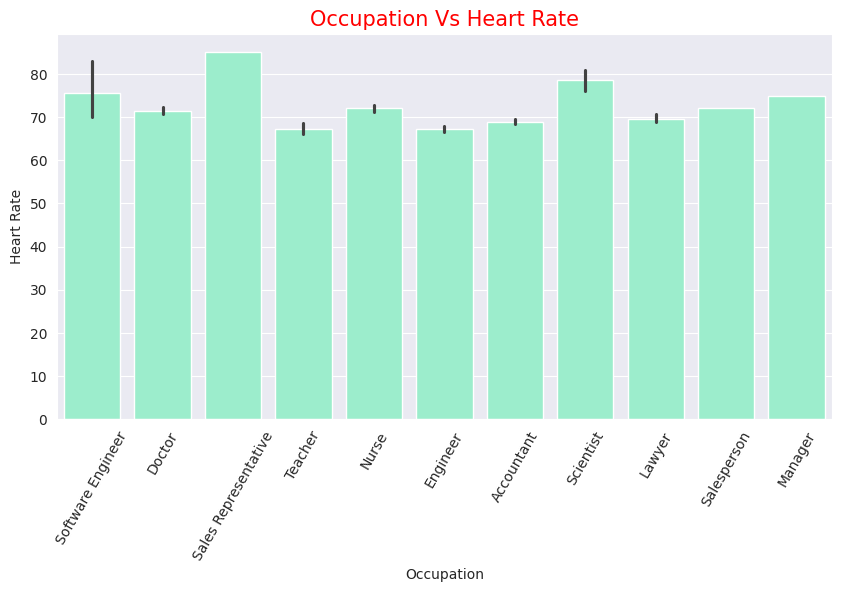

In [30]:

plt.figure(figsize=(10,5))
with sns.axes_style('darkgrid'):
  sns.barplot(data=df,x='Occupation',y='Heart Rate',color='#8FFACF')
  plt.title('Occupation Vs Heart Rate',fontsize=15,color='r')
  plt.xticks(rotation=60)
  plt.show()

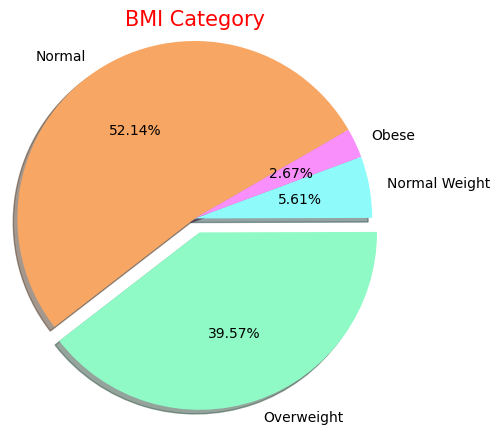

In [31]:
ex=[0,0.1,0,0]
plt.pie(df['BMI Category'].value_counts(),labels=df['BMI Category'].value_counts().index,radius=1.2,shadow=True,autopct='%0.2f%%',explode=ex,colors=['#F8A663','#8FFAC6','#8FFAFA','#F88FFA'],startangle=30)

plt.title('BMI Category',fontsize=15,color='r')
plt.show()

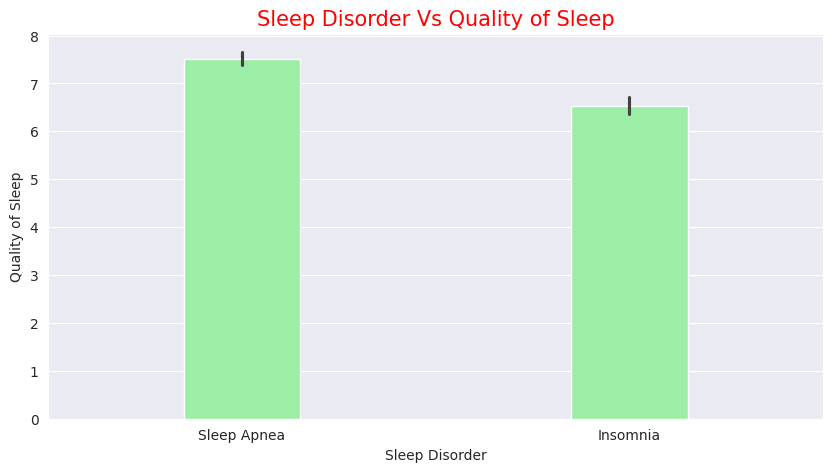

In [32]:
plt.figure(figsize=(10,5))
with sns.axes_style('darkgrid'):
  sns.barplot(data=df,x='Sleep Disorder',y='Quality of Sleep',color='#8FFA9B',width=0.3)
  plt.title('Sleep Disorder Vs Quality of Sleep',fontsize=15,color='r')
  plt.show()

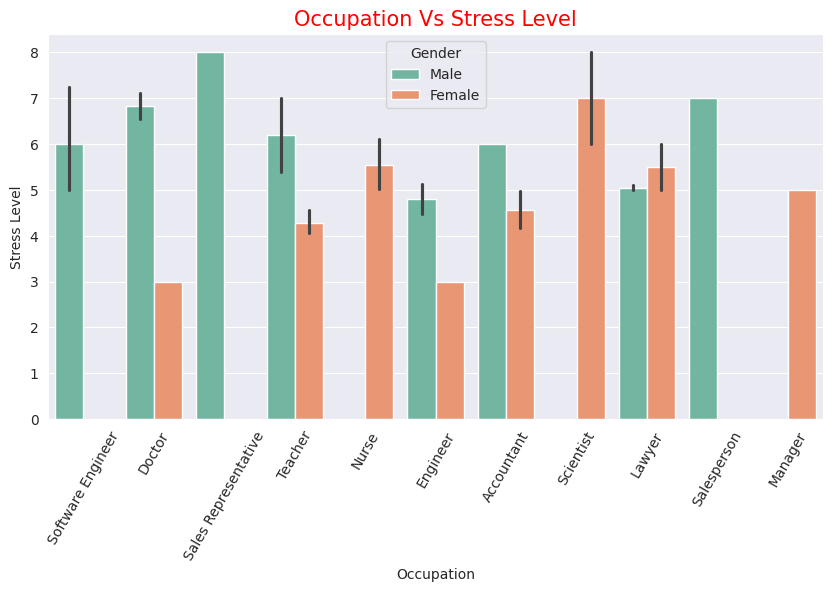

In [33]:
plt.figure(figsize=(10,5))
with sns.axes_style('darkgrid'):
  sns.barplot(data=df,x='Occupation',y='Stress Level',palette='Set2',hue='Gender',width=0.8)
  plt.title('Occupation Vs Stress Level',fontsize=15,color='r')
  plt.xticks(rotation=60)
  plt.show()

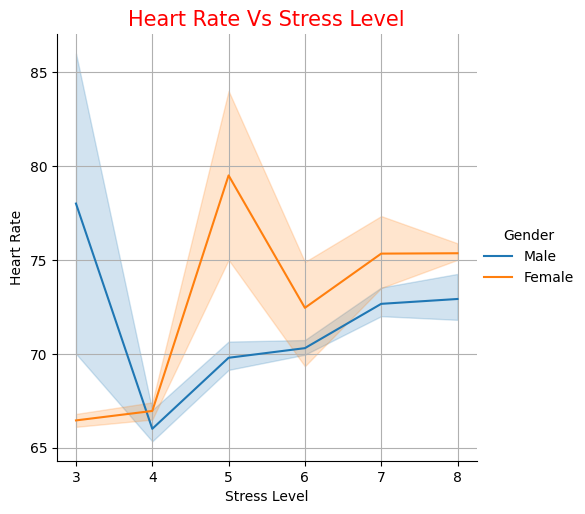

In [34]:
sns.relplot(data=df,y='Heart Rate',x='Stress Level',kind='line',hue='Gender')

plt.title('Heart Rate Vs Stress Level',fontsize=15,color='r')
plt.grid()
plt.show()

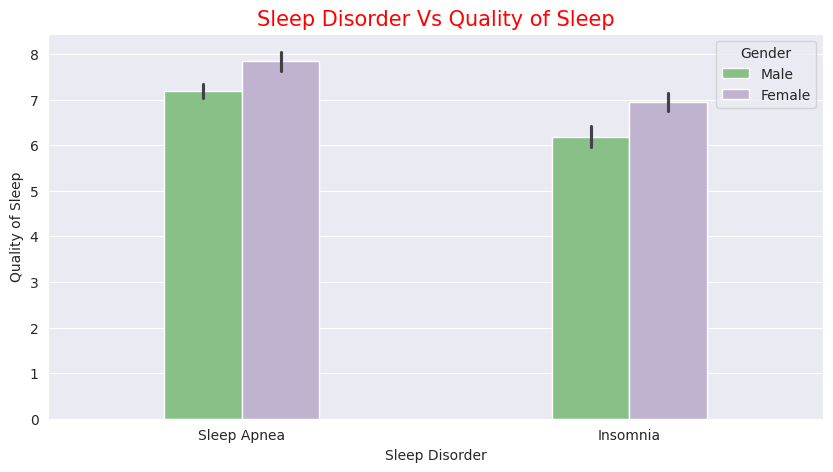

In [35]:
plt.figure(figsize=(10,5))
with sns.axes_style('darkgrid'):
  sns.barplot(data=df,x='Sleep Disorder',y='Quality of Sleep',palette='Accent',width=0.4,hue='Gender')
  plt.title('Sleep Disorder Vs Quality of Sleep',fontsize=15,color='r')
  plt.show()

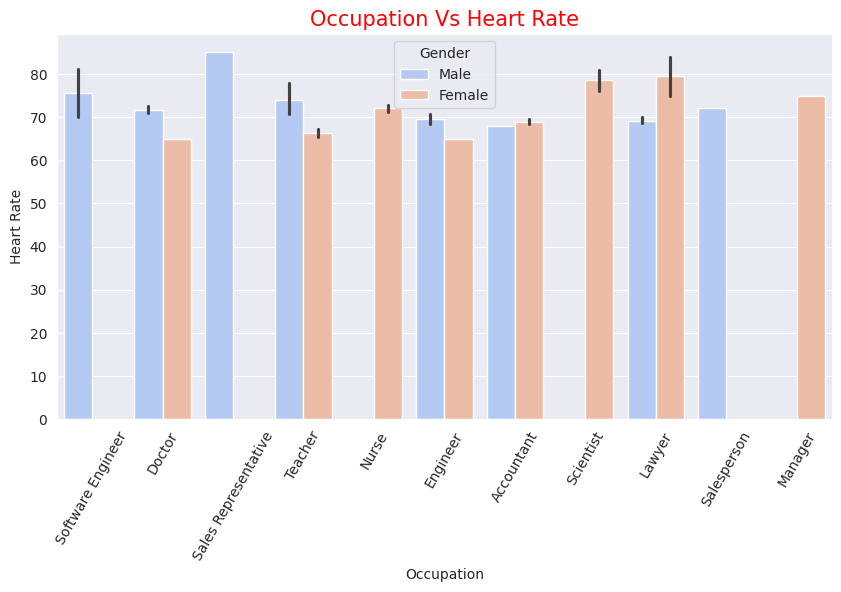

In [36]:
plt.figure(figsize=(10,5))
with sns.axes_style('darkgrid'):
  sns.barplot(data=df,x='Occupation',y='Heart Rate',palette='coolwarm',hue='Gender',width=0.8)
  plt.title('Occupation Vs Heart Rate',fontsize=15,color='r')
  plt.xticks(rotation=60)
  plt.show()

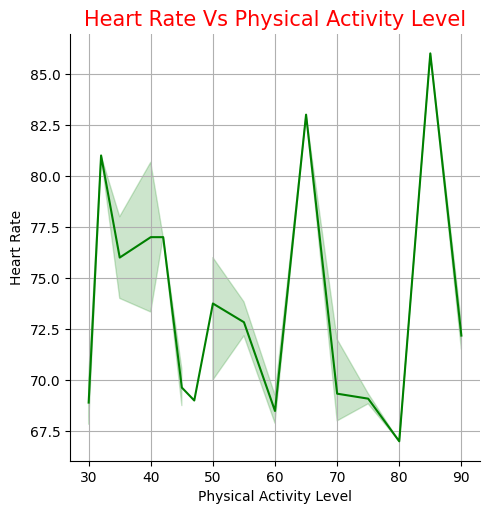

In [37]:
sns.relplot(data=df,y='Heart Rate',x='Physical Activity Level',kind='line',color='g')

plt.title('Heart Rate Vs Physical Activity Level',fontsize=15,color='r')
plt.grid()
plt.show()

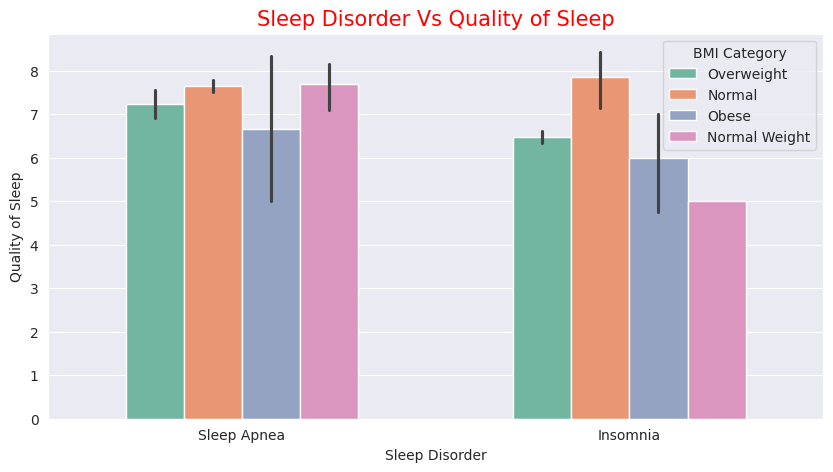

In [38]:
plt.figure(figsize=(10,5))
with sns.axes_style('darkgrid'):
  sns.barplot(data=df,x='Sleep Disorder',y='Quality of Sleep',palette='Set2',width=0.6,hue='BMI Category')
  plt.title('Sleep Disorder Vs Quality of Sleep',fontsize=15,color='r')
  plt.show()

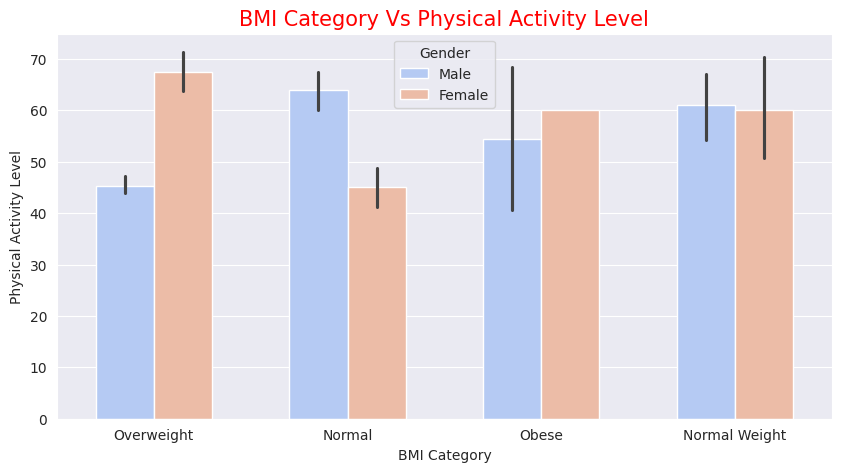

In [39]:
plt.figure(figsize=(10,5))
with sns.axes_style('darkgrid'):
  sns.barplot(data=df,x='BMI Category',y='Physical Activity Level',palette='coolwarm',width=0.6,hue='Gender')
  plt.title('BMI Category Vs Physical Activity Level',fontsize=15,color='r')
  plt.show()

<Figure size 1000x500 with 0 Axes>

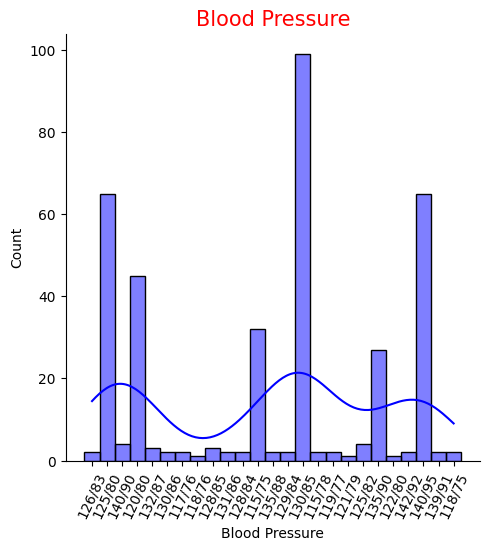

In [40]:
plt.figure(figsize=(10,5))
sns.displot(data=df,x='Blood Pressure',kind='hist',color='b',kde=True)
plt.title('Blood Pressure',fontsize=15,color='r')
plt.xticks(rotation=65)
plt.show()

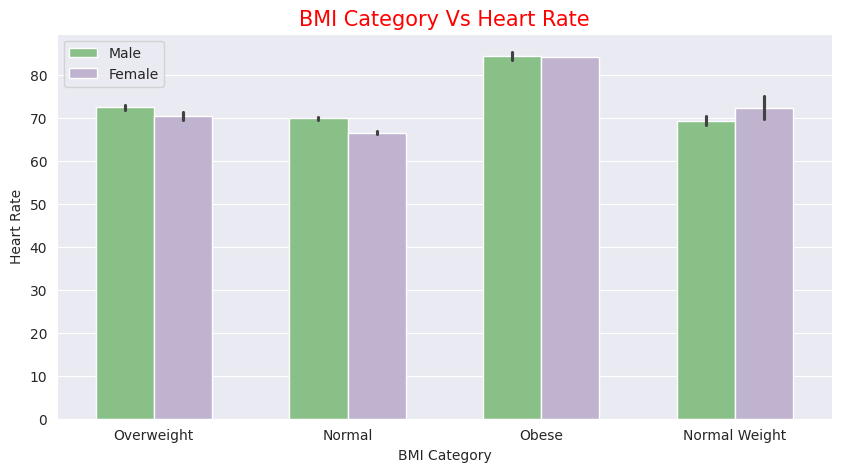

In [41]:
plt.figure(figsize=(10,5))
with sns.axes_style('darkgrid'):
  sns.barplot(data=df,x='BMI Category',y='Heart Rate',palette='Accent',width=0.6,hue='Gender')
  plt.title('BMI Category Vs Heart Rate',fontsize=15,color='r')
  plt.legend(loc=2)
  plt.show()

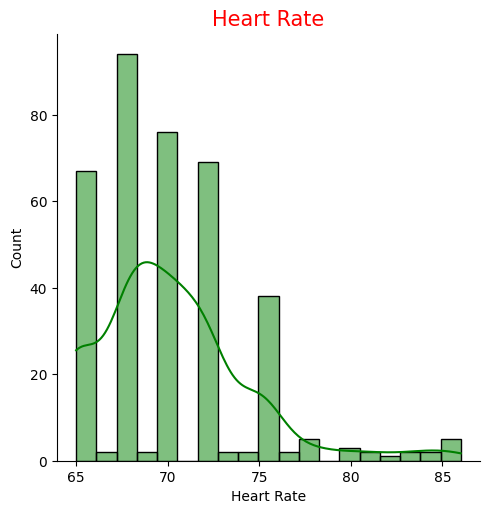

In [42]:
sns.displot(data=df,x='Heart Rate',kind='hist',color='g',kde=True)
plt.title('Heart Rate',fontsize=15,color='r')
plt.show()

<Figure size 3000x1500 with 0 Axes>

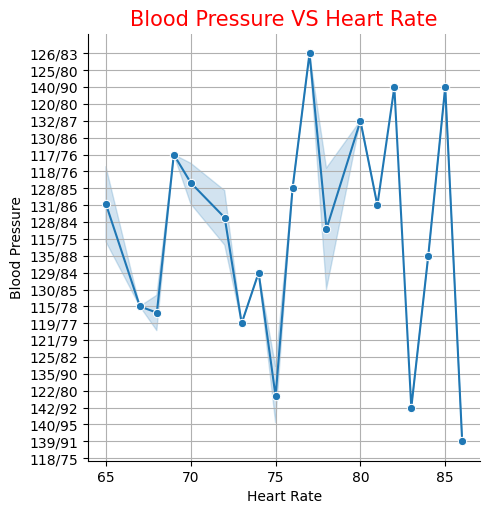

In [43]:
plt.figure(figsize=(30,15))

sns.relplot(data=df,x='Heart Rate',y='Blood Pressure',kind='line',marker='o')

plt.title('Blood Pressure VS Heart Rate',fontsize=15,color='r')

plt.grid()
plt.show()

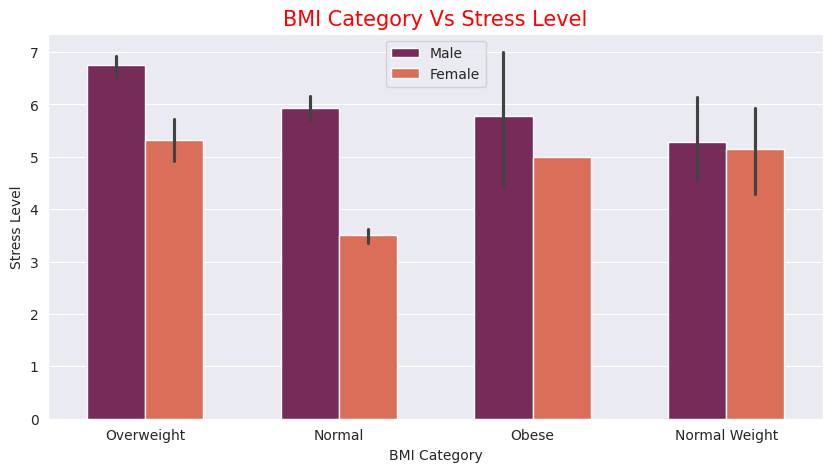

In [44]:
plt.figure(figsize=(10,5))
with sns.axes_style('darkgrid'):
  sns.barplot(data=df,x='BMI Category',y='Stress Level',palette='rocket',width=0.6,hue='Gender')
  plt.title('BMI Category Vs Stress Level',fontsize=15,color='r')
  plt.legend(loc=9)
  plt.show()

In [45]:
df.nunique()

,0
Person ID,374
Gender,2
Age,31
Occupation,11
Sleep Duration,27
Quality of Sleep,6
Physical Activity Level,16
Stress Level,6
BMI Category,4
Blood Pressure,25


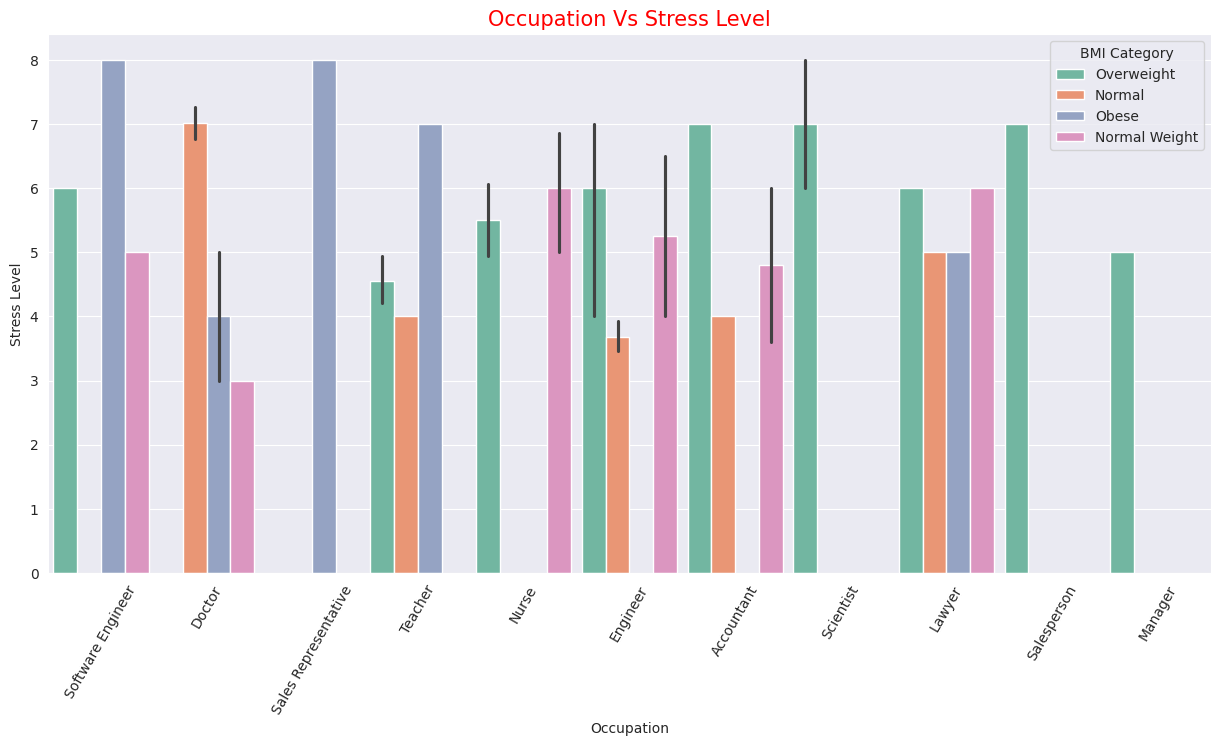

In [46]:
plt.figure(figsize=(15,7))
with sns.axes_style('darkgrid'):
  sns.barplot(data=df,x='Occupation',y='Stress Level',palette='Set2',hue='BMI Category',width=0.9)
  plt.title('Occupation Vs Stress Level',fontsize=15,color='r')
  plt.xticks(rotation=60)
  plt.show()

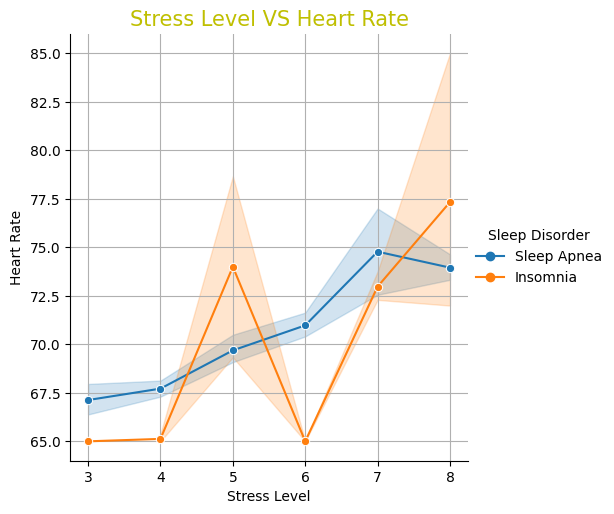

In [47]:
sns.relplot(data=df,x='Stress Level',y='Heart Rate',color='r',kind='line',marker='o',hue='Sleep Disorder')

plt.title('Stress Level VS Heart Rate',fontsize=15,color='y')

plt.grid()
plt.show()

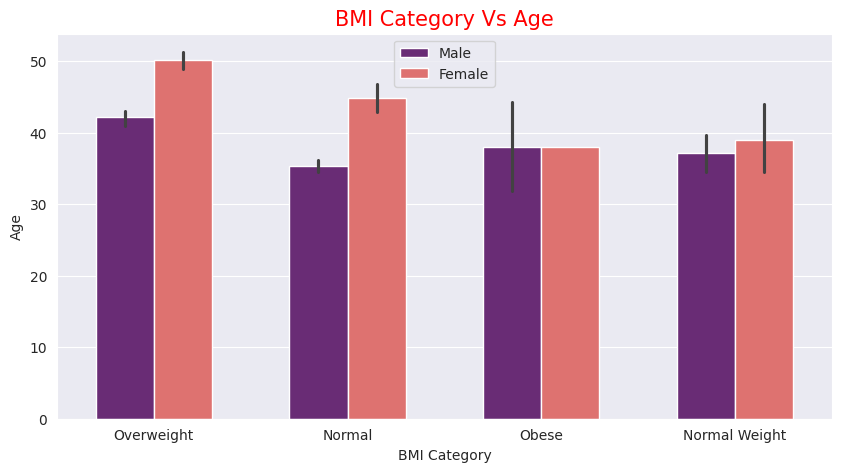

In [48]:
plt.figure(figsize=(10,5))
with sns.axes_style('darkgrid'):
  sns.barplot(data=df,x='BMI Category',y='Age',palette='magma',width=0.6,hue='Gender')
  plt.title('BMI Category Vs Age',fontsize=15,color='r')
  plt.legend(loc=9)
  plt.show()

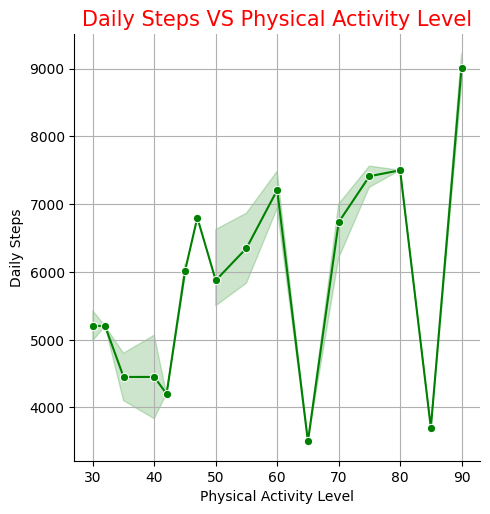

In [49]:

sns.relplot(data=df,y='Daily Steps',x='Physical Activity Level',color='g',kind='line',marker='o')

plt.title('Daily Steps VS Physical Activity Level',fontsize=15,color='r')

plt.grid()
plt.show()

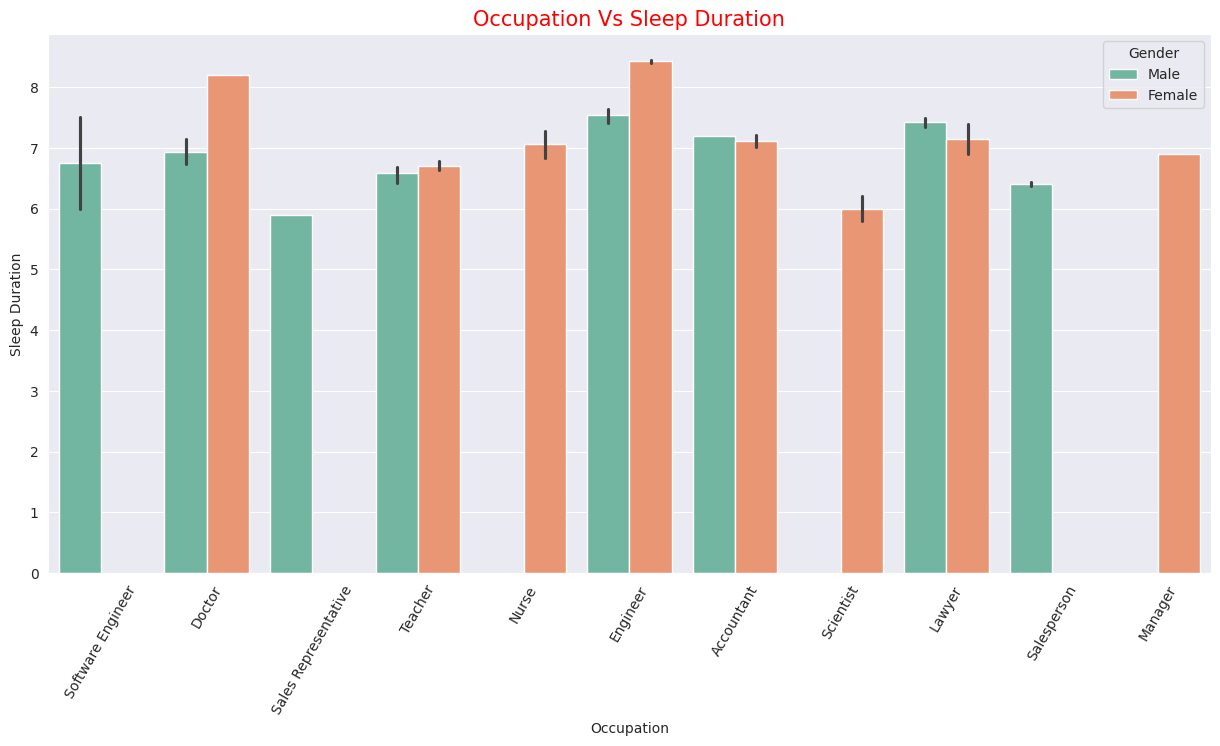

In [50]:
plt.figure(figsize=(15,7))
with sns.axes_style('darkgrid'):
  sns.barplot(data=df,x='Occupation',y='Sleep Duration',palette='Set2',hue='Gender')
  plt.title('Occupation Vs Sleep Duration',fontsize=15,color='r')
  plt.xticks(rotation=60)
  plt.show()

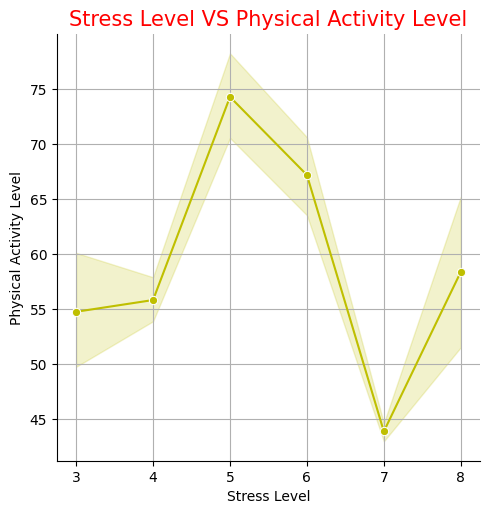

In [51]:

sns.relplot(data=df,x='Stress Level',y='Physical Activity Level',color='y',kind='line',marker='o')

plt.title('Stress Level VS Physical Activity Level',fontsize=15,color='r')

plt.grid()
plt.show()

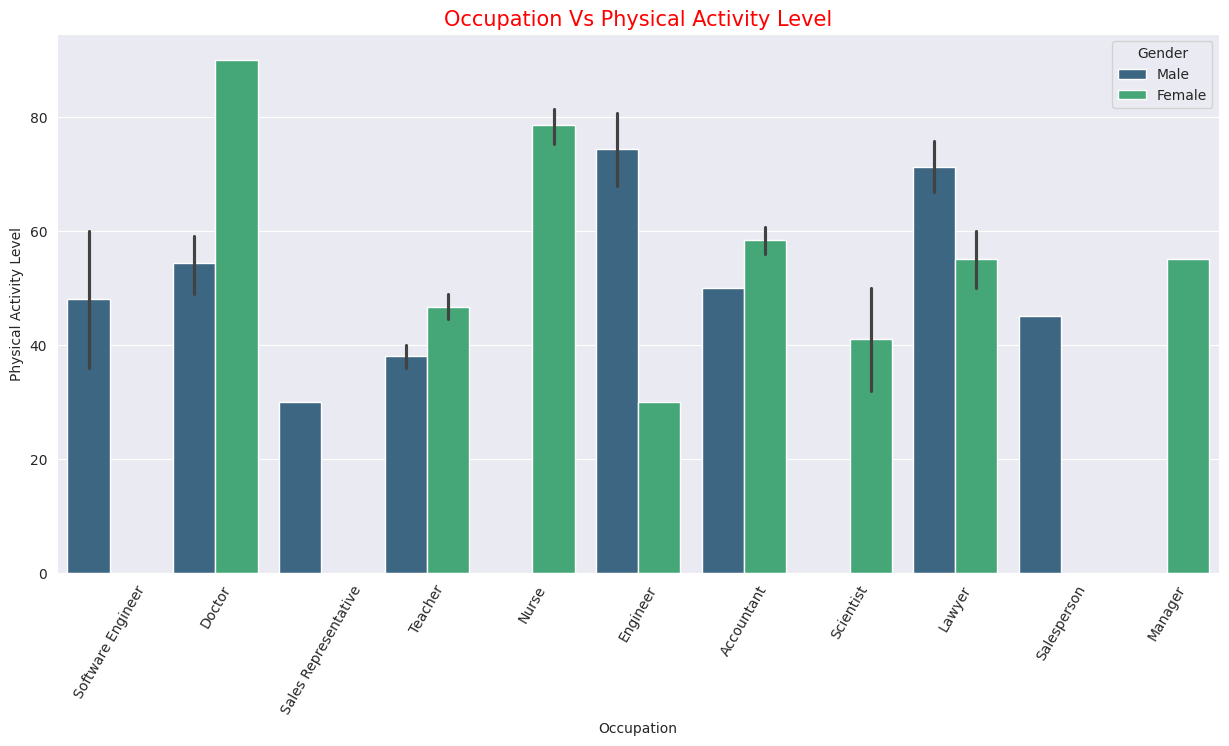

In [52]:
plt.figure(figsize=(15,7))
with sns.axes_style('darkgrid'):
  sns.barplot(data=df,x='Occupation',y='Physical Activity Level',palette='viridis',hue='Gender')
  plt.title('Occupation Vs Physical Activity Level',fontsize=15,color='r')
  plt.xticks(rotation=60)
  plt.show()

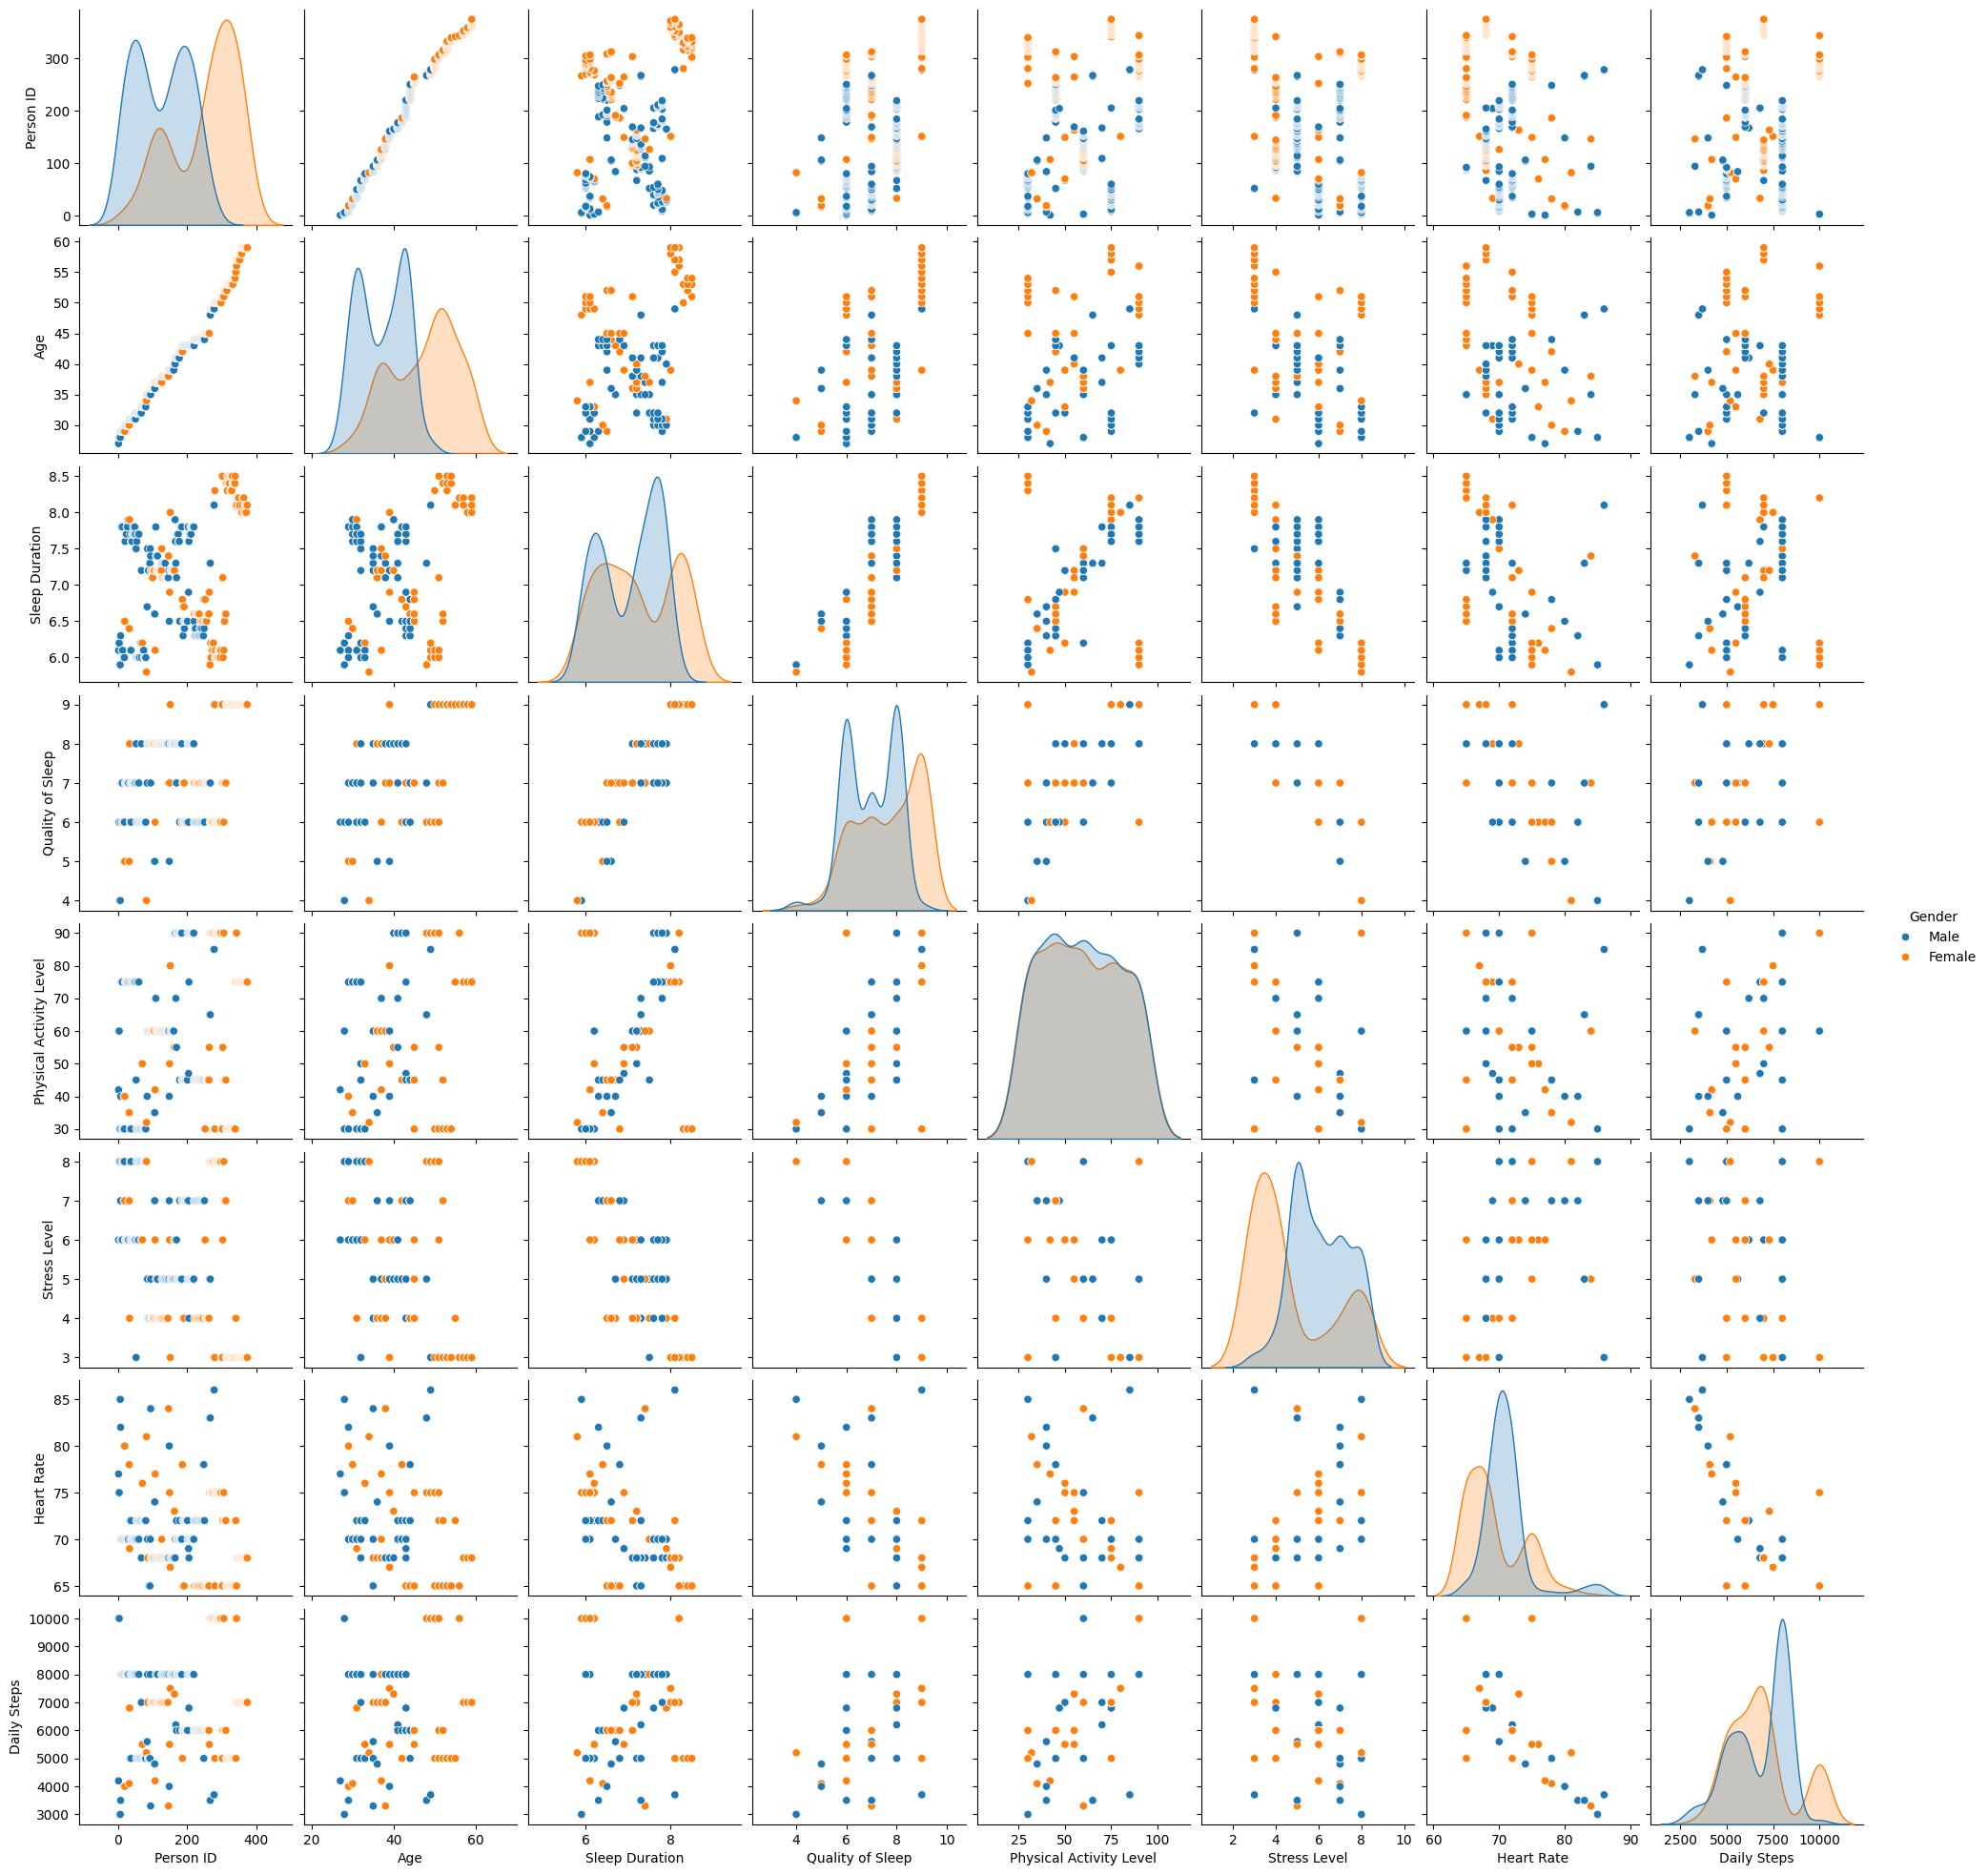

In [54]:

sns.pairplot(data=df,hue='Gender')
plt.show()

In [53]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Sleep Apnea
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Sleep Apnea
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Sleep Apnea
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
